# Problem 1

### You are hired by a Gem Stones co ltd, which is a cubic ziconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27K cubic zirconia. The company is earning different profits on different price slots. You have to help the company in predicting the price for the st ne on the bases of the details given in data so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also provide them with best 5 attributes that are most important.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [2]:
data = pd.read_csv("cubic_zirconia.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
data=data.drop("Unnamed: 0",axis=1)

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
print("Shape of Data set before removing duplicates:",data.shape)

Shape of Data set before removing duplicates: (26967, 10)


In [7]:
data.size

269670

In [8]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

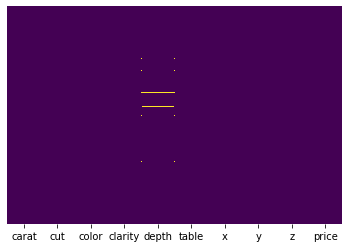

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [11]:
data.duplicated().sum()

34

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
print("Shape of Data set after removing duplicatrs:", data.shape)

Shape of Data set after removing duplicatrs: (26933, 10)


In [14]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933,NaN,NaN,NaN,0.79801,0.477237,0.2,0.4,0.7,1.05,4.5
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26236,NaN,NaN,NaN,61.7453,1.41224,50.8,61,61.8,62.5,73.6
table,26933,NaN,NaN,NaN,57.4559,2.23216,49,56,57,59,79
x,26933,NaN,NaN,NaN,5.72935,1.12737,0,4.71,5.69,6.55,10.23
y,26933,NaN,NaN,NaN,5.7331,1.16504,0,4.71,5.7,6.54,58.9
z,26933,NaN,NaN,NaN,3.53777,0.719964,0,2.9,3.52,4.04,31.8
price,26933,NaN,NaN,NaN,3937.53,4022.55,326,945,2375,5356,18818


In [15]:
data.depth.nunique()

169

In [16]:
data['depth']=data['depth'].replace(np.nan,data.depth.median())

In [17]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

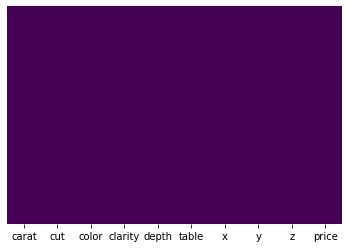

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
for col in data.columns:
    if data[col].dtypes=='object':
        print(col,"\n")
        print(data[col].value_counts())

cut 

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64
color 

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64
clarity 

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64


In [20]:
for col in data.columns:
    if data[col].dtypes!='object':
        print(col,"\n")
        print(data[col].min())

carat 

0.2
depth 

50.8
table 

49.0
x 

0.0
y 

0.0
z 

0.0
price 

326


In [21]:
data.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          2
y          2
z          8
price      0
dtype: int64

In [22]:
data1 = data[(data!=0).all(1)]

In [23]:
data1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [24]:
data1.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [25]:
for col in data1.columns:
    if data1[col].dtypes!='object':
        print(col,"\n")
        print(data1[col].min())

carat 

0.2
depth 

50.8
table 

49.0
x 

3.73
y 

3.71
z 

1.07
price 

326


In [26]:
data1.shape

(26925, 10)

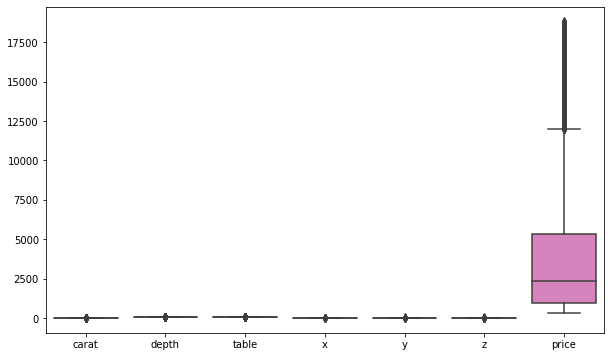

In [27]:
fig=plt.figure(figsize=(10,6))
sns.boxplot(data=data1)

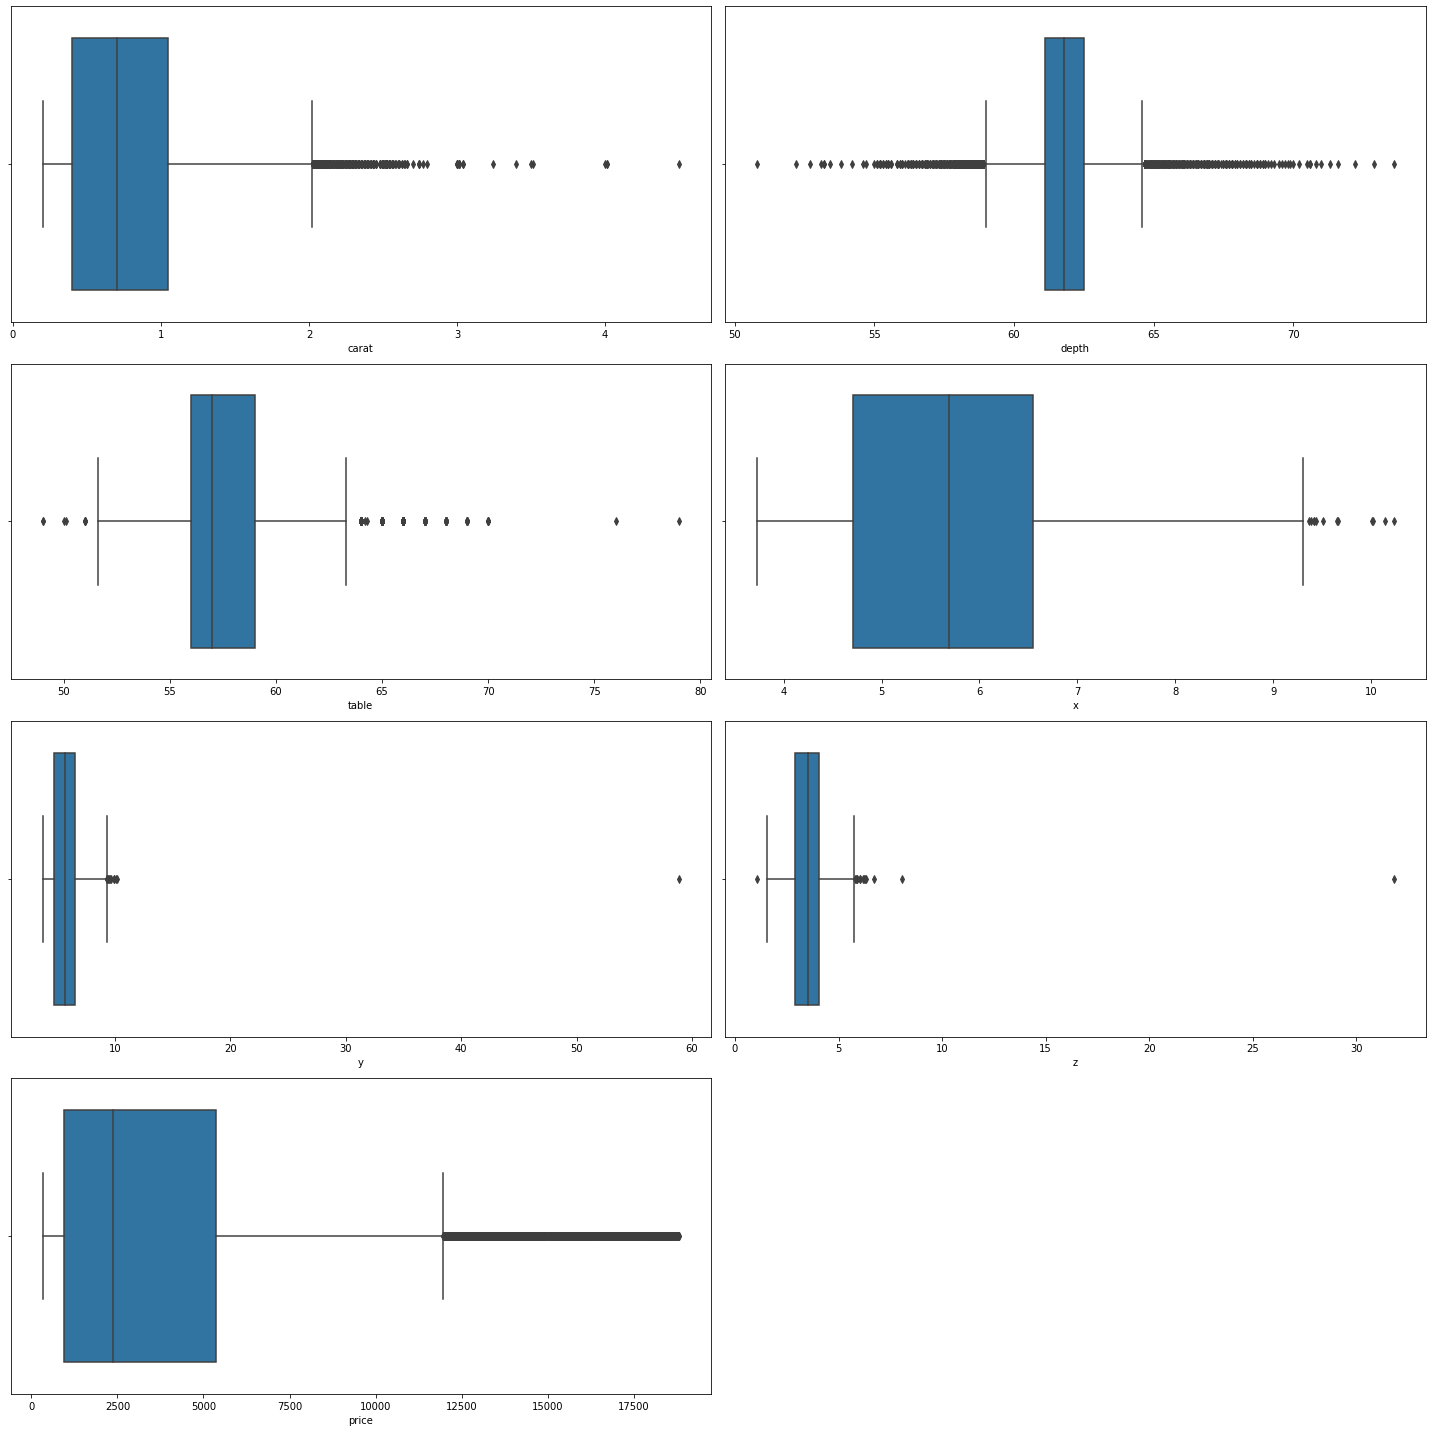

In [28]:
data_plot=data1[['carat','depth','table','x','y','z','price']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

In [29]:
def treat_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [30]:
for col in ['carat','depth','table','x','y','z','price']:
    least,maximum=treat_outliers(data1[col])
    data1[col]=np.where(data1[col]<least,least,data1[col])
    data1[col]=np.where(data1[col]>maximum,maximum,data1[col])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


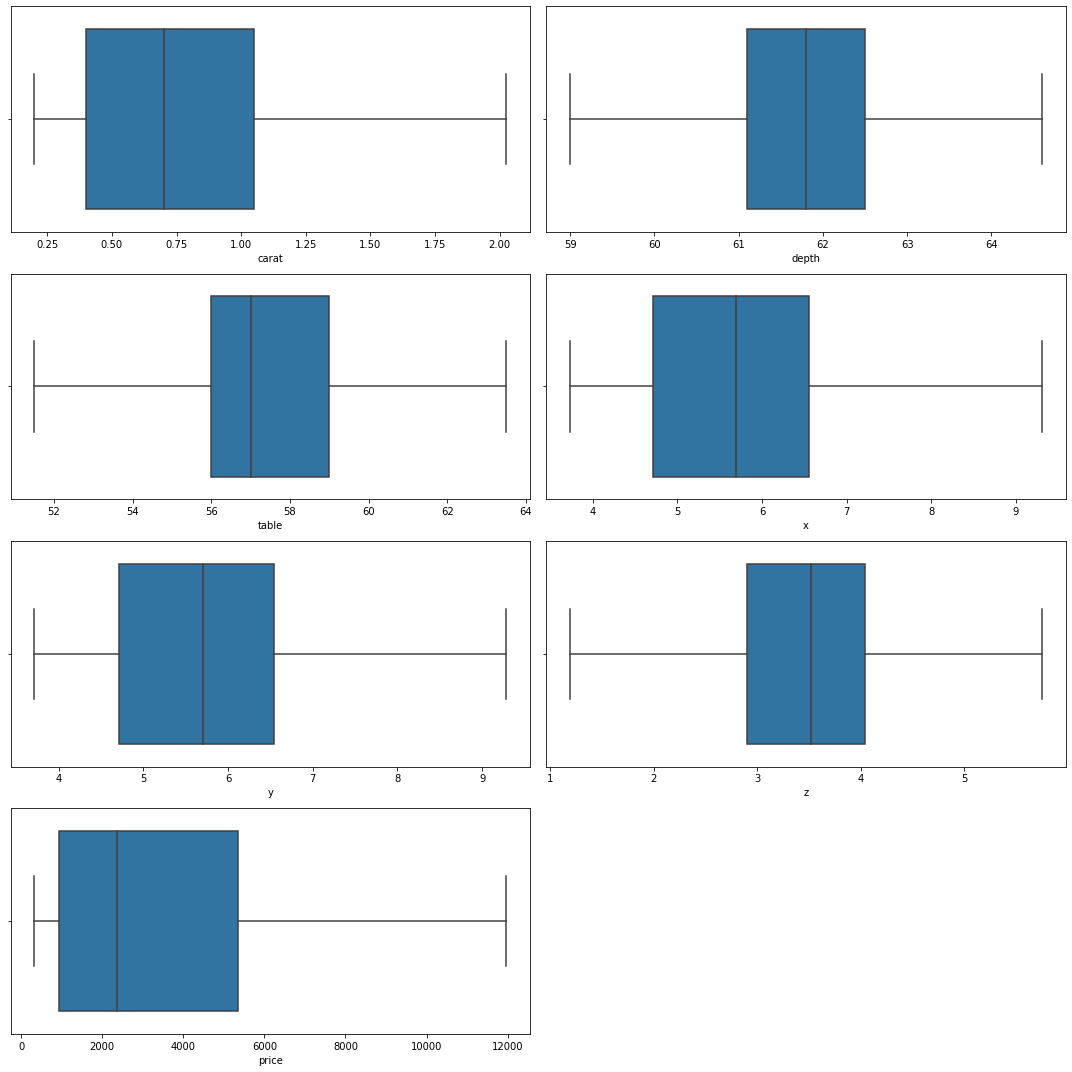

In [31]:
data_plot=data1[['carat','depth','table','x','y','z','price']]
fig=plt.figure(figsize=(15,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

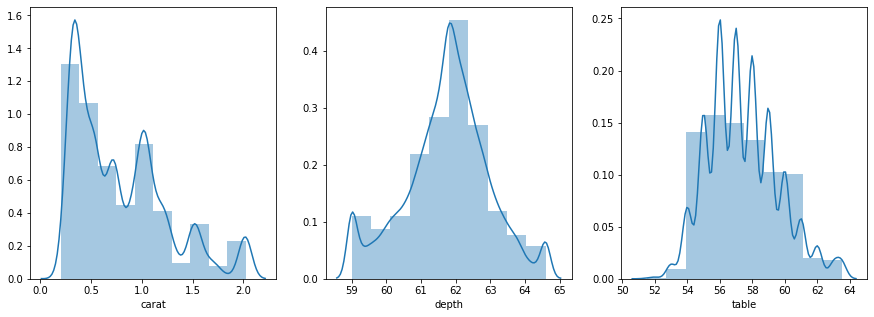

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(data1.carat,bins=10)
plt.subplot(1,3,2)
sns.distplot(data1.depth,bins=10)
plt.subplot(1,3,3)
sns.distplot(data1.table,bins=10)

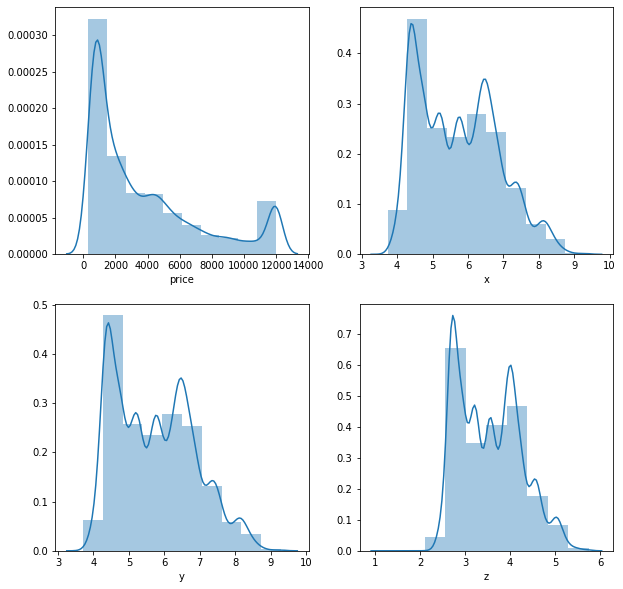

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data1.price,bins=10)
plt.subplot(2,2,2)
sns.distplot(data1.x,bins=10)
plt.subplot(2,2,3)
sns.distplot(data1.y,bins=10)
plt.subplot(2,2,4)
sns.distplot(data1.z,bins=10)

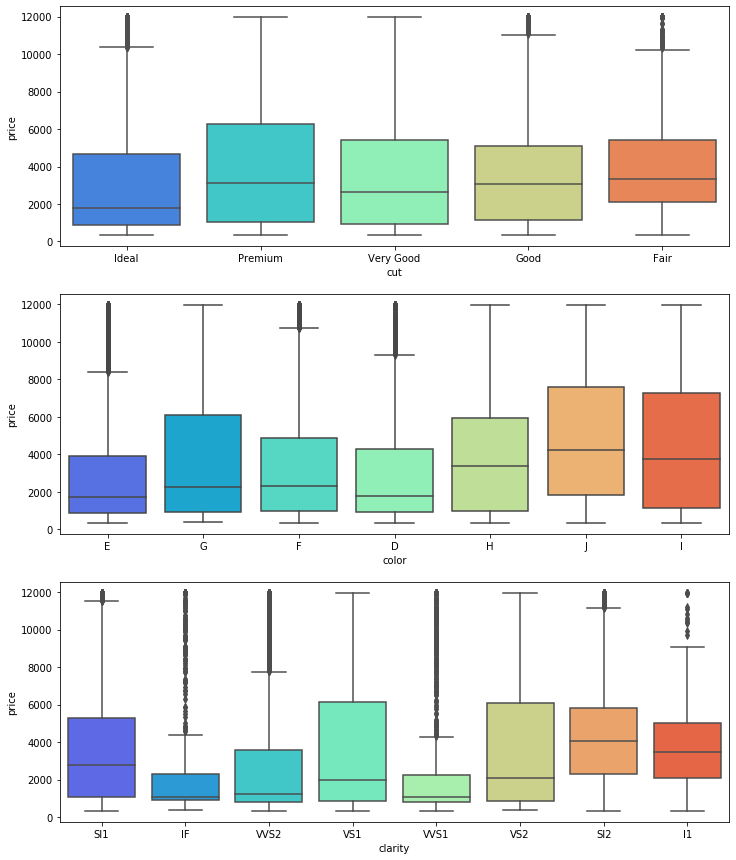

In [34]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
sns.boxplot(x='cut',y='price',data=data1,palette='rainbow')
plt.subplot(3,1,2)
sns.boxplot(x='color',y='price',data=data1,palette='rainbow')
plt.subplot(3,1,3)
sns.boxplot(x='clarity',y='price',data=data1,palette='rainbow')

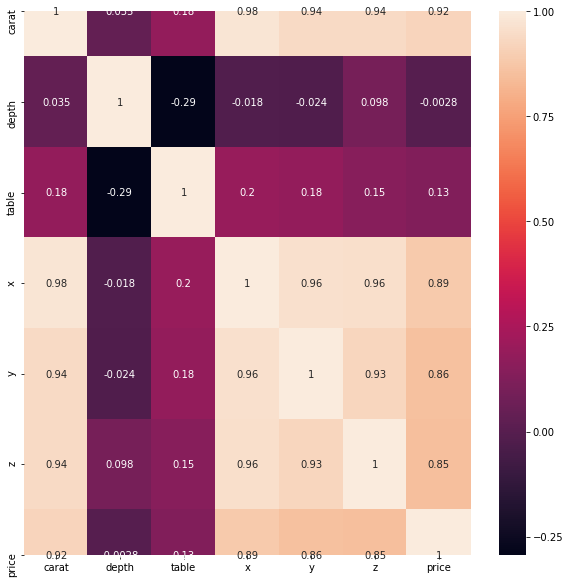

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

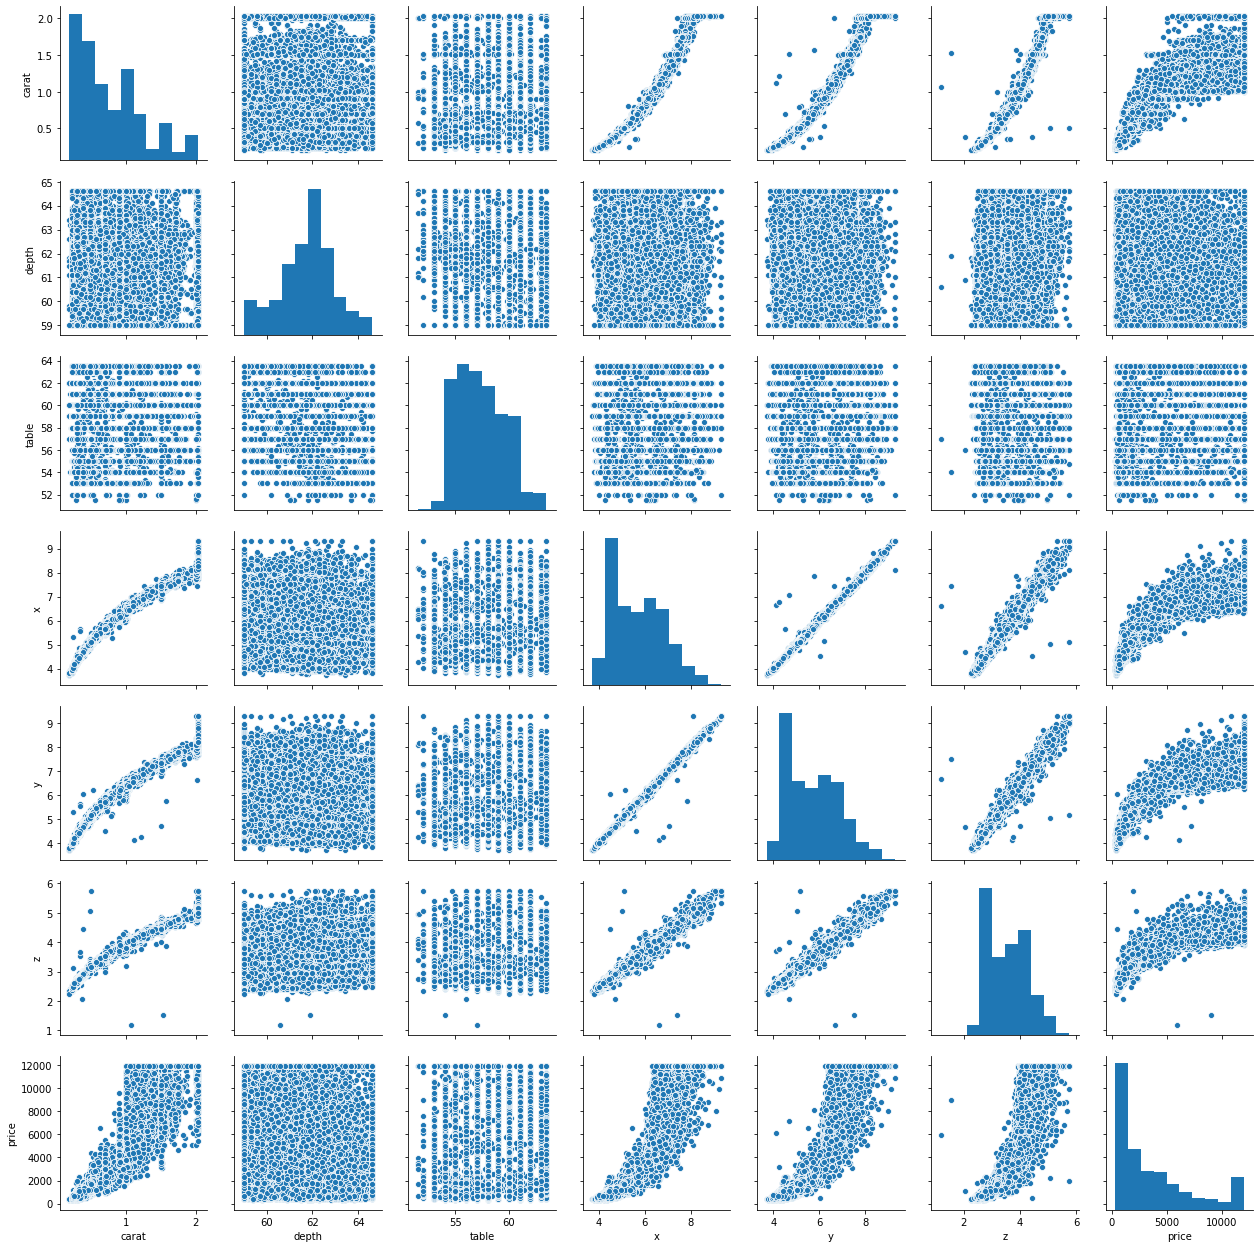

In [36]:
sns.pairplot(data1)

In [37]:
sub_set1 = data1.groupby(['cut'])['x'].mean()
sub_set1

cut
Fair         6.290988
Good         5.843698
Ideal        5.500197
Premium      5.964610
Very Good    5.752243
Name: x, dtype: float64

In [38]:
sub_set2 = data1.groupby(['cut'])['y'].mean()
sub_set2

cut
Fair         6.222965
Good         5.858429
Ideal        5.511267
Premium      5.931710
Very Good    5.781474
Name: y, dtype: float64

In [39]:
sub_set3 = data1.groupby(['cut'])['z'].mean()
sub_set3

cut
Fair         3.995841
Good         3.646167
Ideal        3.396543
Premium      3.644737
Very Good    3.565222
Name: z, dtype: float64

In [40]:
sub_set4 = data1.groupby(['color'])['price'].mean()
sub_set4

color
D    3067.771027
E    2956.374288
F    3537.406184
G    3810.162301
H    4215.174529
I    4730.496926
J    5008.376389
Name: price, dtype: float64

In [41]:
sub_set5 = data1.groupby(['cut'])['price'].mean()
sub_set5

cut
Fair         4364.383825
Good         3770.679540
Ideal        3282.618788
Premium      4276.784593
Very Good    3829.352912
Name: price, dtype: float64

In [42]:
sub_set6 = data1.groupby(['clarity'])['price'].mean()
sub_set6

clarity
I1      3850.662983
IF      2592.427609
SI1     3812.165143
SI2     4738.905722
VS1     3652.068527
VS2     3746.075837
VVS1    2424.065797
VVS2    3165.168379
Name: price, dtype: float64

In [43]:
sub_set7 = data1.groupby(['color'])['x'].mean()
sub_set7

color
D    5.414352
E    5.403961
F    5.599748
G    5.678947
H    5.977658
I    6.236127
J    6.512771
Name: x, dtype: float64

In [44]:
sub_set8 = data1.groupby(['color'])['y'].mean()
sub_set8

color
D    5.419113
E    5.409329
F    5.603681
G    5.680949
H    5.973013
I    6.235991
J    6.512427
Name: y, dtype: float64

In [45]:
sub_set9 = data1.groupby(['color'])['z'].mean()
sub_set9

color
D    3.340997
E    3.333674
F    3.453998
G    3.506989
H    3.694305
I    3.855262
J    4.029500
Name: z, dtype: float64

In [46]:
for feature in data1.columns:
    if data1[feature].dtype=='object':
        print('\n')
        print('feature',feature)
        print(pd.Categorical(data1[feature].unique()))
        print(pd.Categorical(data1[feature].unique()).codes)
        data1[feature]=pd.Categorical(data1[feature]).codes



feature cut
[Ideal, Premium, Very Good, Good, Fair]
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]
[2 3 4 1 0]


feature color
[E, G, F, D, H, J, I]
Categories (7, object): [D, E, F, G, H, I, J]
[1 3 2 0 4 6 5]


feature clarity
[SI1, IF, VVS2, VS1, VVS1, VS2, SI2, I1]
Categories (8, object): [I1, IF, SI1, SI2, VS1, VS2, VVS1, VVS2]
[2 1 7 4 6 5 3 0]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [47]:
data1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779.0


In [48]:
X = data1.drop('price', axis=1)
Y = data1[['price']]

In [49]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09
26963,0.33,2,4,1,61.9,55.0,4.44,4.42,2.74
26964,0.51,3,1,5,61.7,58.0,5.12,5.15,3.17
26965,0.27,4,2,7,61.8,56.0,4.19,4.20,2.60


In [50]:
X.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70


In [51]:
Y

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0
...,...
26962,5408.0
26963,1114.0
26964,1656.0
26965,682.0


In [52]:
Y.head(2)

,price
0,499.0
1,984.0


In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30 , random_state=3)

In [54]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9247.952338311885
The coefficient for cut is 48.61601902413208
The coefficient for color is -228.47973905428842
The coefficient for clarity is 253.08215604457789
The coefficient for depth is -35.780610353902404
The coefficient for table is -74.67075939760124
The coefficient for x is -1721.47117493798
The coefficient for y is 1773.477620383861
The coefficient for z is -1217.8460026985097


In [56]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 6405.139296486178


In [57]:
regression_model.score(X_train, Y_train)

0.9114687679012446

In [58]:
regression_model.score(X_test, Y_test)

0.9062159896304377

In [59]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
2395,0.360,2,2,1,61.4,55.9,4.58,4.62,2.82,1138.0
13203,0.410,2,1,7,61.8,57.0,4.80,4.75,2.95,1243.0
22767,0.310,3,4,6,60.6,59.0,4.36,4.38,2.65,707.0
12693,0.410,2,2,5,62.1,56.0,4.79,4.74,2.96,1107.0
9751,2.025,4,4,3,63.6,58.0,8.51,8.59,5.44,11965.0


In [60]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    6405.139296
carat        9247.952338
cut            48.616019
color        -228.479739
clarity       253.082156
depth         -35.780610
table         -74.670759
x           -1721.471175
y            1773.477620
z           -1217.846003
dtype: float64

In [61]:
print(lm1.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:35:26   Log-Likelihood:            -1.5750e+05
No. Observations:               18847   AIC:                         3.150e+05
Df Residuals:                   18837   BIC:                         3.151e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6405.1393    874.130      7.327      0.0

In [62]:
mse = np.mean((regression_model.predict(X_test)-Y_test)**2)

In [63]:
import math
math.sqrt(mse)

1063.4714496340512

In [64]:
regression_model.score(X_test, Y_test)

0.9062159896304377

In [65]:
Y_pred = regression_model.predict(X_test)

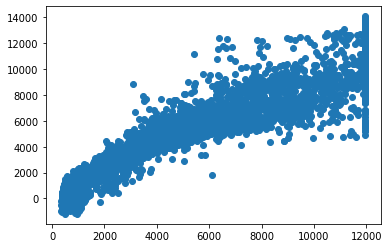

In [66]:
plt.scatter(Y_test['price'], Y_pred)

In [67]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
Y_train_scaled = Y_train.apply(zscore)
Y_test_scaled = Y_test.apply(zscore)

In [68]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, Y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2324217587231112
The coefficient for cut is 0.0143949188276129
The coefficient for color is -0.11238061949177941
The coefficient for clarity is 0.12611202754560644
The coefficient for depth is -0.012573495611097442
The coefficient for table is -0.04659676845353955
The coefficient for x is -0.5586079055256574
The coefficient for y is 0.5713537826816286
The coefficient for z is -0.244295392577682


In [70]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 9.005373400324053e-16


In [71]:
regression_model.score(X_test_scaled, Y_test_scaled)

0.906210639478066

In [72]:
regression_model.score(X_train_scaled, Y_train_scaled)

0.9114687679012446

In [73]:
mse = np.mean((regression_model.predict(X_test_scaled)-Y_test_scaled)**2)

In [74]:
math.sqrt(mse)

0.30625048656603593

In [75]:
mse = np.mean((regression_model.predict(X_train_scaled)-Y_train_scaled)**2)

In [76]:
math.sqrt(mse)

0.2975419837581836

In [77]:
Y_pred = regression_model.predict(X_test_scaled)

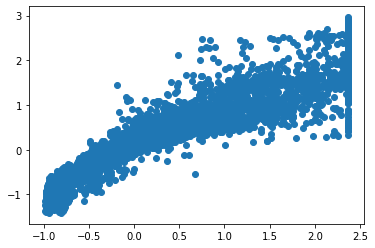

In [78]:
plt.scatter(Y_test_scaled['price'], Y_pred)

In [79]:
data_train_scaled = pd.concat([X_train_scaled, Y_train_scaled], axis=1)
data_train_scaled.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
2395,-0.934555,-0.541483,-0.354120,-1.650687,-0.292145,-0.714756,-1.018044,-0.991394,-1.028981,-0.746744
13203,-0.826229,-0.541483,-0.941113,1.825735,0.036501,-0.205819,-0.822299,-0.874891,-0.841871,-0.716429
22767,-1.042881,0.433611,0.819865,1.246331,-0.949436,0.719520,-1.213790,-1.206478,-1.273663,-0.871183
12693,-0.826229,-0.541483,-0.354120,0.666928,0.282985,-0.668489,-0.831196,-0.883852,-0.827478,-0.755695
9751,2.672700,1.408705,0.819865,-0.491880,1.515407,0.256851,2.478681,2.566454,2.742003,2.379223


In [80]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train_scaled).fit()
lm1.params

Intercept    1.183949e-16
carat        1.232422e+00
cut          1.439492e-02
color       -1.123806e-01
clarity      1.261120e-01
depth       -1.257350e-02
table       -4.659677e-02
x           -5.586079e-01
y            5.713538e-01
z           -2.442954e-01
dtype: float64

In [81]:
print(lm1.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:38:09   Log-Likelihood:                -3896.4
No. Observations:               18847   AIC:                             7813.
Df Residuals:                   18837   BIC:                             7891.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.184e-16      0.002   5.46e-14      1.0

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [84]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 121.7660147888945
cut ---> 7.674028323101852
color ---> 3.6684719643883685
clarity ---> 6.307913574147748
depth ---> 1001.3770837638131
table ---> 730.6192830108478
x ---> 10360.189211972505
y ---> 9462.48763951711
z ---> 2806.317628731724


# Problem 2

## Logistic Regression 

### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees some opted for the package and some did not. You have to help the company in predicting wheather an employee will opt for the package or not on the basis of the information given in data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
data = pd.read_csv("Holiday_Package.csv")

In [184]:
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [185]:
data=data.drop("Unnamed: 0",axis=1)

In [186]:
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [187]:
data.shape

(872, 7)

In [188]:
data.size

6104

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [190]:
data.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [191]:
print("The sum of all the duplicates values is:",data.duplicated().sum())

The sum of all the duplicates values is: 0


In [192]:
data.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [193]:
(data.Holliday_Package.value_counts()/data.shape[0])*100

no     54.013761
yes    45.986239
Name: Holliday_Package, dtype: float64

In [194]:
for col in data.columns:
    if data[col].dtypes=='object':
        print(col)
        print(data[col].value_counts())
        print("\n")

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




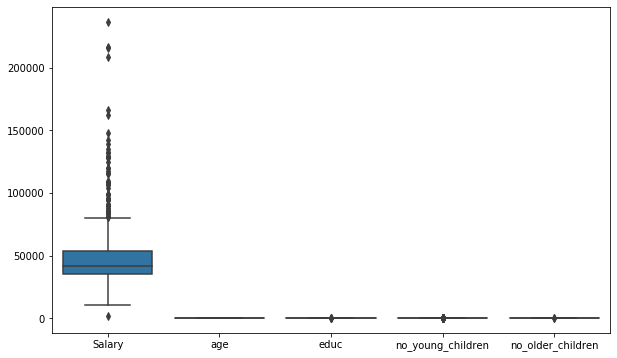

In [195]:
fig=plt.figure(figsize=(10,6))
sns.boxplot(data=data)

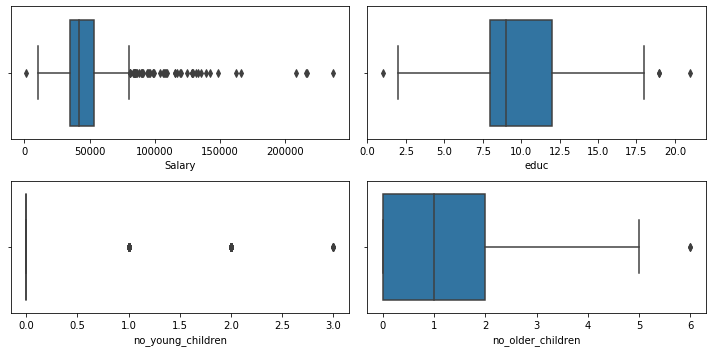

In [196]:
data_plot=data[['Salary','educ','no_young_children','no_older_children']]
fig=plt.figure(figsize=(10,5))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

In [197]:
def treat_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [198]:
for col in ['Salary','age','educ','no_young_children','no_older_children']:
    least,maximum=treat_outliers(data[col])
    data[col]=np.where(data[col]<least,least,data[col])
    data[col]=np.where(data[col]>maximum,maximum,data[col])

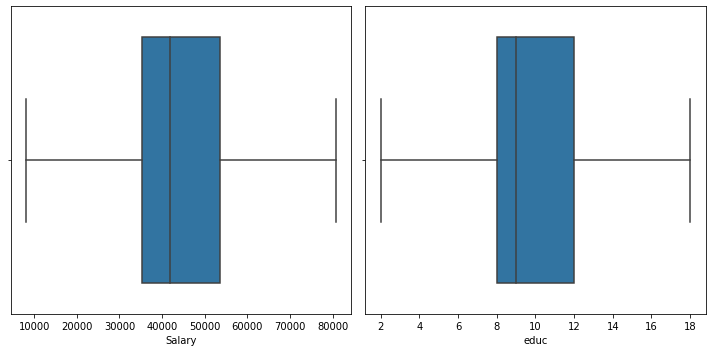

In [199]:
data_plot=data[['Salary','educ']]
fig=plt.figure(figsize=(10,5))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(1,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


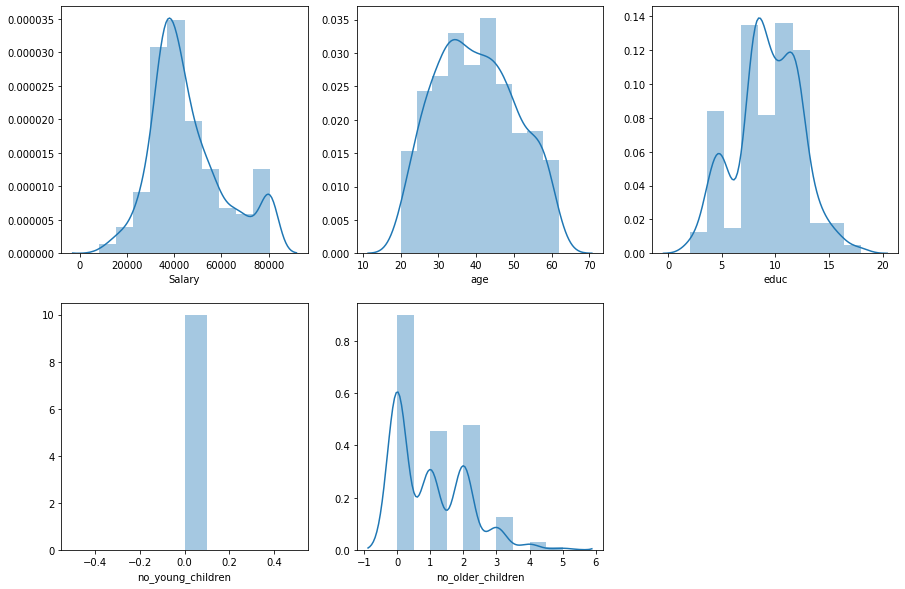

In [200]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.distplot(data.Salary,bins=10)
plt.subplot(2,3,2)
sns.distplot(data.age,bins=10)
plt.subplot(2,3,3)
sns.distplot(data.educ,bins=10)
plt.subplot(2,3,4)
sns.distplot(data.no_young_children,bins=10)
plt.subplot(2,3,5)
sns.distplot(data.no_older_children,bins=10)

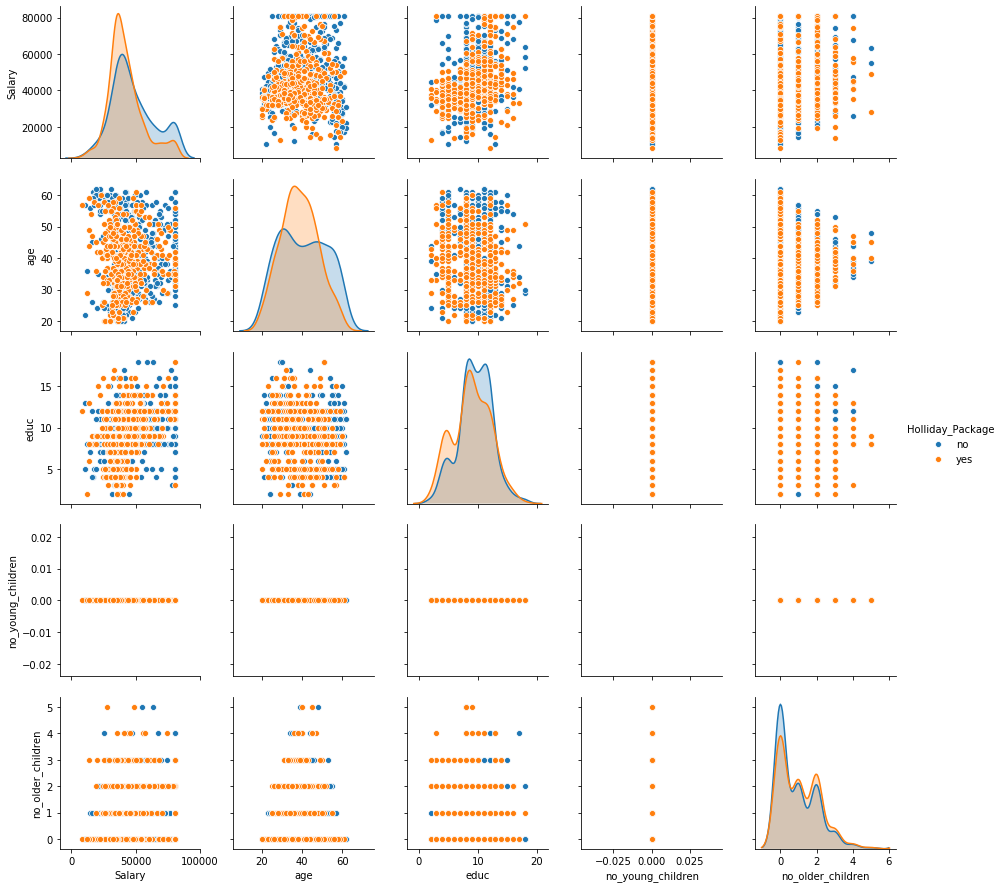

In [201]:
sns.pairplot(data,hue='Holliday_Package')

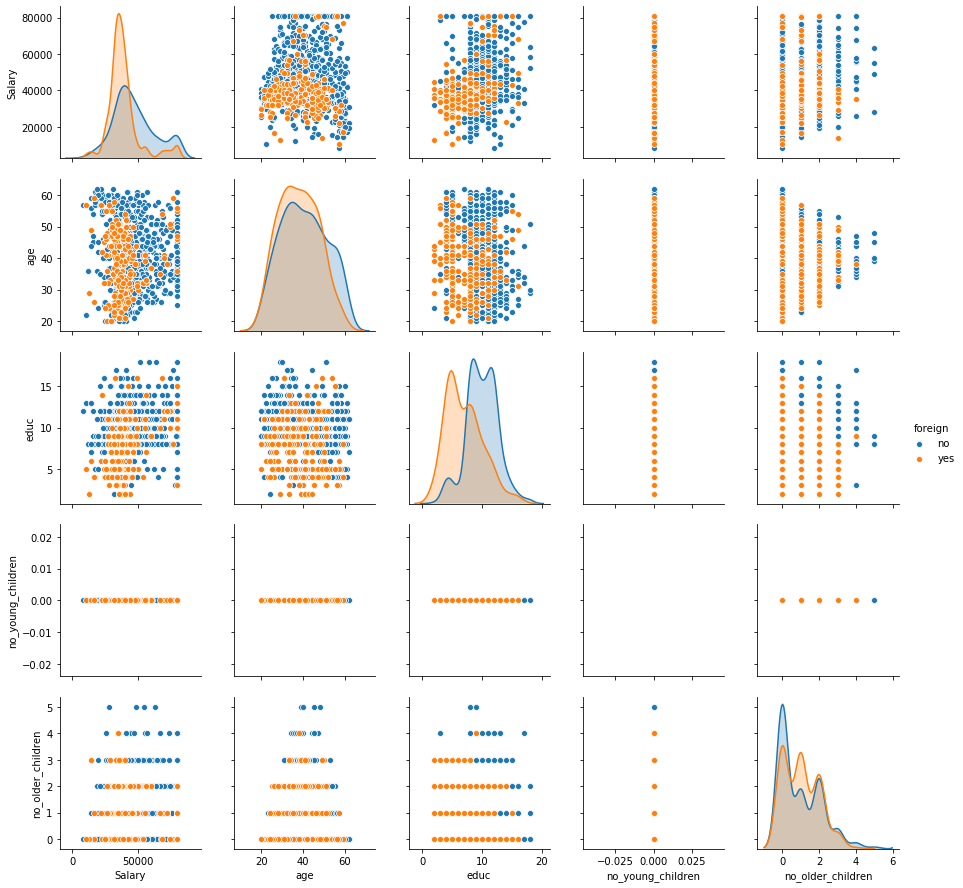

In [202]:
sns.pairplot(data,hue='foreign')

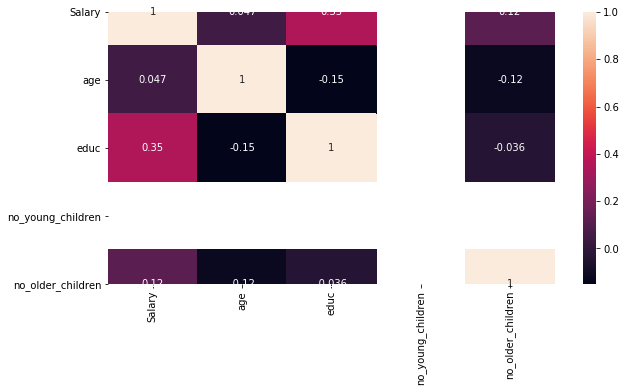

In [203]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

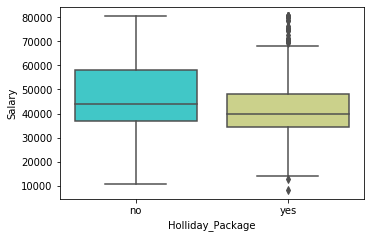

In [204]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
sns.boxplot(x='Holliday_Package',y='Salary',data=data,palette='rainbow')

In [205]:
for feature in data.columns:
    if data[feature].dtype=='object':
        print('\n')
        print('feature',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature]=pd.Categorical(data[feature]).codes



feature Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [206]:
data.head(2)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,0.0,1.0,0
1,1,37207.0,45.0,8.0,0.0,1.0,0


In [207]:
X=data.drop('Holliday_Package',axis=1)
Y=data[['Holliday_Package']]

In [208]:
X.head(2)

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30.0,8.0,0.0,1.0,0
1,37207.0,45.0,8.0,0.0,1.0,0


In [209]:
Y.head(2)

,Holliday_Package
0,0
1,1


In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [211]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, Y_train)
Y_predict_train = model.predict(X_train)
Y_predict_test=model.predict(X_test)
model_score_train = model.score(X_train, Y_train)
model_score_test = model.score(X_test,Y_test)
print("train accuracy:")
print(model_score_train)
print('\n')
print("test accuracy:")
print(model_score_test)
print('\n')
print("confusion matrix for train:")
print(metrics.confusion_matrix(Y_train, Y_predict_train))
print('\n')
print("confusion matrix for test:")
print(metrics.confusion_matrix(Y_test, Y_predict_test))
print('\n')
print("classification report for train:")
print(metrics.classification_report(Y_train, Y_predict_train))
print('\n')
print("classification report for test")
print(metrics.classification_report(Y_test, Y_predict_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


train accuracy:
0.6409836065573771


test accuracy:
0.6297709923664122


confusion matrix for train:
[[265  61]
 [158 126]]


confusion matrix for test:
[[113  32]
 [ 65  52]]


classification report for train:
              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.67      0.44      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



classification report for test
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.6s finished


AUC: 0.667


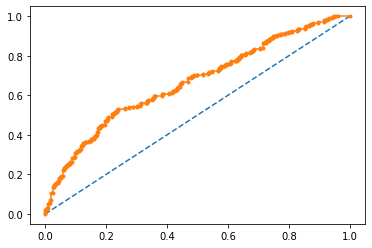

In [212]:
probs = model.predict_proba(X_train)
probs = probs[:,1]
auc = metrics.roc_auc_score(Y_train,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = metrics.roc_curve(Y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.661


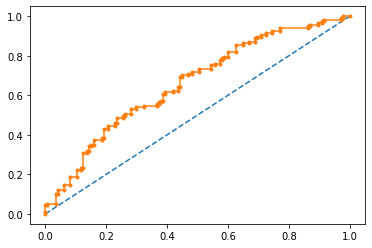

In [213]:
probs = model.predict_proba(X_test)
probs = probs[:,1]
auc = metrics.roc_auc_score(Y_test,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = metrics.roc_curve(Y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [214]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

In [215]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [216]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=2,scoring='f1')

In [217]:
grid_search.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='warn',
                                          n_jobs=2, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [218]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=2, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [219]:
best_model = grid_search.best_estimator_

In [220]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [221]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.695362,0.304638
1,0.340526,0.659474
2,0.612071,0.387929
3,0.686392,0.313608
4,0.353342,0.646658


In [222]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [223]:
print(classification_report(Y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.68      0.45      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.63       610
weighted avg       0.65      0.64      0.63       610
 



In [224]:
print(classification_report(Y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.63      0.77      0.70       145
           1       0.61      0.44      0.51       117

    accuracy                           0.63       262
   macro avg       0.62      0.61      0.61       262
weighted avg       0.62      0.63      0.61       262
 



AUC: 0.667


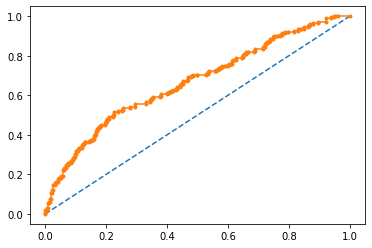

In [225]:
probs = best_model.predict_proba(X_train)
probs = probs[:,1]
auc = metrics.roc_auc_score(Y_train,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = metrics.roc_curve(Y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.662


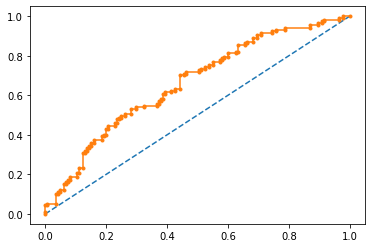

In [226]:
probs = best_model.predict_proba(X_test)
probs = probs[:,1]
auc = metrics.roc_auc_score(Y_test,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = metrics.roc_curve(Y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [227]:
print("Accuracy for training data set:",best_model.score(X_train, Y_train))
print("Accuracy for testing data set:",best_model.score(X_test,Y_test))

Accuracy for training data set: 0.6442622950819672
Accuracy for testing data set: 0.6259541984732825


In [228]:
print("confusion matrix for train:")
print(metrics.confusion_matrix(Y_train, ytrain_predict))
print('\n')
print("confusion matrix for test:")
print(metrics.confusion_matrix(Y_test, ytest_predict))
print('\n')

confusion matrix for train:
[[265  61]
 [156 128]]


confusion matrix for test:
[[112  33]
 [ 65  52]]




## LDA

In [230]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610, 1)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262, 1)


In [231]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [232]:
pred_class_train = model.predict(X_train)

In [233]:
pred_class_test = model.predict(X_test)

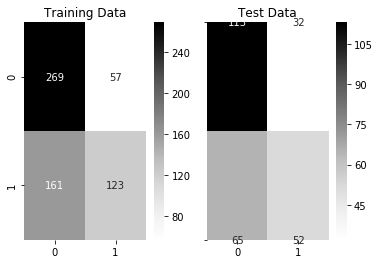

In [234]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [235]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



In [236]:
pred_prob_train = model.predict_proba(X_train)

In [237]:
pred_prob_test = model.predict_proba(X_test)

In [238]:
pred_prob_train[:,1]

array([0.29232736, 0.71218516, 0.25941094, 0.32072989, 0.48465835,
       0.6589039 , 0.37617241, 0.3215668 , 0.21855144, 0.44852479,
       0.34499238, 0.24274809, 0.3626753 , 0.38323241, 0.46971577,
       0.70744216, 0.82618411, 0.41298232, 0.42611419, 0.74640861,
       0.53722701, 0.2076308 , 0.49742148, 0.41181601, 0.33751753,
       0.41312542, 0.44985376, 0.34497108, 0.75805699, 0.32832053,
       0.68478009, 0.70307903, 0.43421205, 0.31621611, 0.42003704,
       0.37019078, 0.41712146, 0.38318837, 0.34120849, 0.35763096,
       0.38256474, 0.48738393, 0.37220926, 0.67726743, 0.32788312,
       0.73236176, 0.56328541, 0.39077477, 0.38782118, 0.46711305,
       0.41904625, 0.38570596, 0.49491867, 0.36655139, 0.80610163,
       0.40853665, 0.48606621, 0.22836863, 0.73551411, 0.45068862,
       0.26261954, 0.44939141, 0.49185238, 0.71908308, 0.35292084,
       0.32707741, 0.48779143, 0.74857005, 0.22200694, 0.46730359,
       0.3384402 , 0.30639497, 0.46221896, 0.70205593, 0.39421

AUC for the Training Data: 0.667
AUC for the Test Data: 0.662


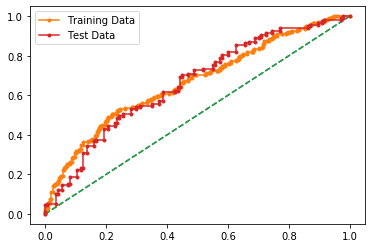

In [239]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [240]:
print("Accuracy for training data set:",model.score(X_train, Y_train))
print("Accuracy for testing data set:",model.score(X_test,Y_test))

Accuracy for training data set: 0.6426229508196721
Accuracy for testing data set: 0.6297709923664122
